In [1]:
from importlib import reload
import json
import re

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import SVG, display_html

%cd /root/rolling-pin/python
from rolling_pin import tools, utils, blob_etl, repo_etl
from rolling_pin.blob_etl import BlobETL
from rolling_pin.repo_etl import RepoETL
reload(tools)
reload(utils)
reload(blob_etl)
reload(repo_etl)

pd.set_option('display.max_colwidth', 500)

/root/rolling-pin/python


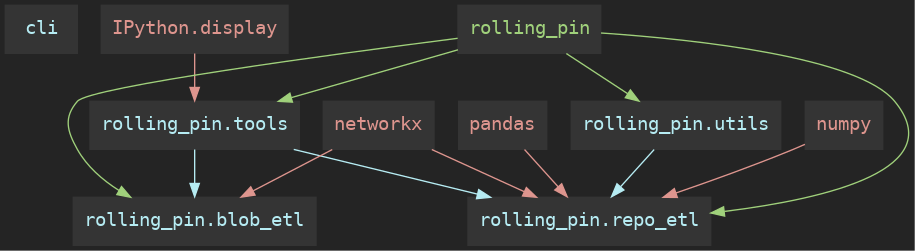

In [3]:
source = '/root/rolling-pin/python'
# d = RepoETL(source, exclude_regex='__init__')
d = RepoETL(source)
d.to_html(as_png=True)

In [4]:
d.to_dataframe()

,node_name,node_type,x,y,dependencies,subpackages,fullpath
0,cli,module,1.5,2,[],[],/root/rolling-pin/python/cli.py
1,rolling_pin.blob_etl,module,1.0,0,"[networkx, rolling_pin.tools, rolling_pin]",[rolling_pin],/root/rolling-pin/python/rolling_pin/blob_etl.py
2,rolling_pin.repo_etl,module,2.0,0,"[numpy, pandas, networkx, rolling_pin.tools, rolling_pin.utils, rolling_pin]",[rolling_pin],/root/rolling-pin/python/rolling_pin/repo_etl.py
3,rolling_pin.tools,module,0.0,0,"[IPython.display, rolling_pin]",[rolling_pin],/root/rolling-pin/python/rolling_pin/tools.py
4,rolling_pin.utils,module,3.0,0,[rolling_pin],[rolling_pin],/root/rolling-pin/python/rolling_pin/utils.py
5,IPython.display,library,0.0,4,[],[],NaN
6,networkx,library,1.0,4,[],[],NaN
7,rolling_pin,subpackage,1.5,3,[],[],NaN
8,numpy,library,2.0,4,[],[],NaN
9,pandas,library,3.0,4,[],[],NaN


In [10]:
x = '{"shape": {"rows": 1, "columns": 1, "format": "SBS96"}, "op": "liquid_handle", "locations": [{"transports": [{"mode_params": {"tip_position": {"position_z": {"reference": "well_top", "offset": "1:millimeter"}}}}, {"volume": "-5:microliter", "mode_params": {"liquid_class": "air", "tip_position": {"position_z": {"reference": "preceding_position"}}}}, {"mode_params": {"tip_position": {"position_z": {"reference": "well_top"}}}}, {"mode_params": {"tip_position": {"position_z": {"detection": {"method": "capacitance"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-5:microliter", "pump_override_volume": "-5:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "5:microliter", "pump_override_volume": "5:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"mode_params": {"tip_position": {"position_z": {"reference": "well_top"}}}}, {"volume": "-2:microliter", "mode_params": {"liquid_class": "air", "tip_position": {"position_z": {"reference": "preceding_position"}}}}], "location": "Inducer-Solvent Source/0"}, {"transports": [{"mode_params": {"tip_position": {"position_z": {"reference": "well_top"}}}}, {"volume": "2:microliter", "mode_params": {"liquid_class": "air", "tip_position": {"position_z": {"reference": "preceding_position"}}}}, {"mode_params": {"tip_position": {"position_z": {"reference": "well_top"}}}}, {"mode_params": {"tip_position": {"position_z": {"detection": {"method": "capacitance"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"mode_params": {"tip_position": {"position_z": {"reference": "well_top"}}}}, {"mode_params": {"tip_position": {"position_z": {"detection": {"method": "capacitance"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"mode_params": {"tip_position": {"position_z": {"reference": "well_top"}}}}, {"volume": "5:microliter", "mode_params": {"liquid_class": "air", "tip_position": {"position_z": {"reference": "preceding_position"}}}}], "location": "Inducer Reservoir/2"}], "mode": "air_displacement"}'
x = json.loads(x)

leafs = ['liquid_class', 'reference', 'volume', 'method', 'offset']
for leaf in leafs:
    b = BlobETL(x)
    b = b.filter(lambda x: re.search('0>/transports', x))
    b = b.filter(lambda x: re.search(leaf, x))
    html = b.to_html(layout='dot')
    display_html(html)